In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('new hcv data imputed.csv')
data

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32.0,1,38.50,52.500000,7.7,22.1,7.50,6.93,3.23,106.0,12.10,69.0
1,1,32.0,1,38.50,70.300000,18.0,24.7,3.90,11.17,4.80,74.0,15.60,76.5
2,2,32.0,1,46.90,74.700000,36.2,25.0,6.10,8.84,5.20,86.0,33.20,79.3
3,3,32.0,1,43.20,52.000000,30.6,22.6,18.90,7.33,4.74,80.0,33.80,75.7
4,4,32.0,1,39.20,74.100000,32.6,24.8,9.60,9.15,4.32,76.0,29.90,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,62.0,0,32.00,66.300000,5.9,25.0,6.95,5.57,6.30,55.7,21.55,68.5
611,611,64.0,0,42.05,102.800000,2.9,44.4,20.00,8.27,3.02,63.0,35.90,71.3
612,612,64.0,0,42.05,87.300000,3.5,25.0,6.95,8.27,3.63,66.7,64.20,82.0
613,613,46.0,0,33.00,76.287690,39.0,25.0,20.00,3.56,4.20,52.0,50.00,71.0


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,1,38.50,52.500000,7.7,22.1,7.50,6.93,3.23,106.0,12.10,69.0
1,32.0,1,38.50,70.300000,18.0,24.7,3.90,11.17,4.80,74.0,15.60,76.5
2,32.0,1,46.90,74.700000,36.2,25.0,6.10,8.84,5.20,86.0,33.20,79.3
3,32.0,1,43.20,52.000000,30.6,22.6,18.90,7.33,4.74,80.0,33.80,75.7
4,32.0,1,39.20,74.100000,32.6,24.8,9.60,9.15,4.32,76.0,29.90,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,0,32.00,66.300000,5.9,25.0,6.95,5.57,6.30,55.7,21.55,68.5
611,64.0,0,42.05,102.800000,2.9,44.4,20.00,8.27,3.02,63.0,35.90,71.3
612,64.0,0,42.05,87.300000,3.5,25.0,6.95,8.27,3.63,66.7,64.20,82.0
613,46.0,0,33.00,76.287690,39.0,25.0,20.00,3.56,4.20,52.0,50.00,71.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    float64
 1   Sex     615 non-null    int64  
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.8 KB


In [5]:
data.shape

(615, 12)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.359350,9.983829,19.00,39.000,47.00,54.000,76.00
Sex,615.0,0.613008,0.487458,0.00,0.000,1.00,1.000,1.00
ALB,615.0,42.065063,4.216063,29.20,39.200,42.05,45.100,54.40
ALP,615.0,66.938499,19.000122,11.30,52.950,66.30,79.300,120.20
ALT,615.0,23.721191,10.869086,0.90,16.400,21.50,29.400,57.70
AST,615.0,26.082114,6.834422,10.60,21.600,25.00,29.450,49.30
BIL,615.0,7.878293,3.875060,0.80,5.300,6.95,9.750,20.00
CHE,615.0,8.237138,1.795797,3.29,7.030,8.27,9.465,13.30
CHOL,615.0,5.323725,1.012162,2.61,4.625,5.30,6.020,8.11
CREA,615.0,78.067967,14.211795,40.00,68.000,76.70,88.000,119.00


<Axes: >

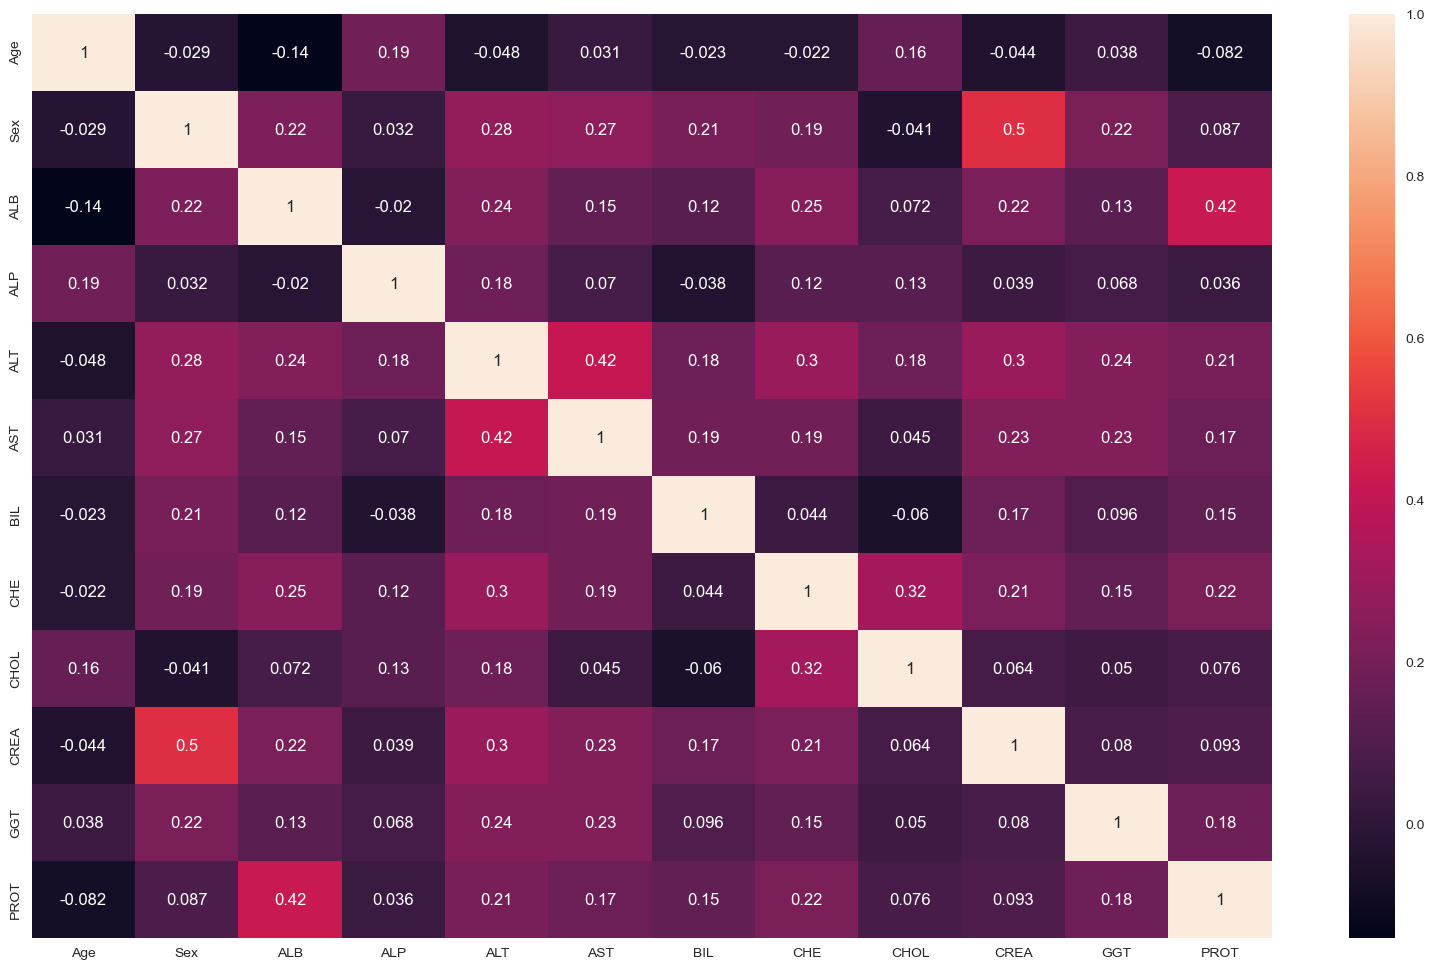

In [7]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True)

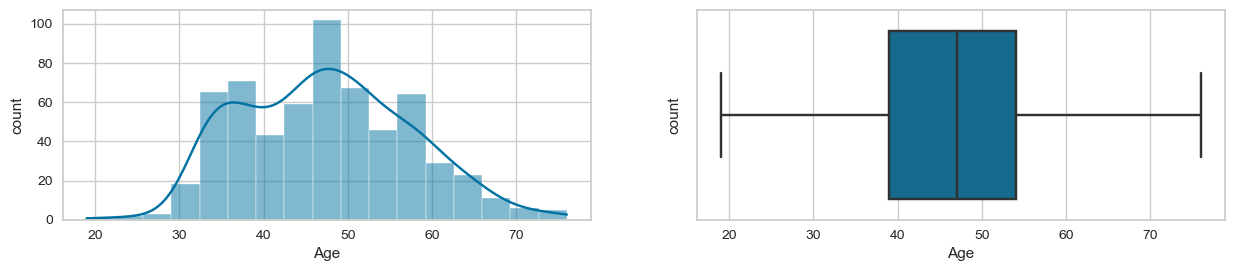

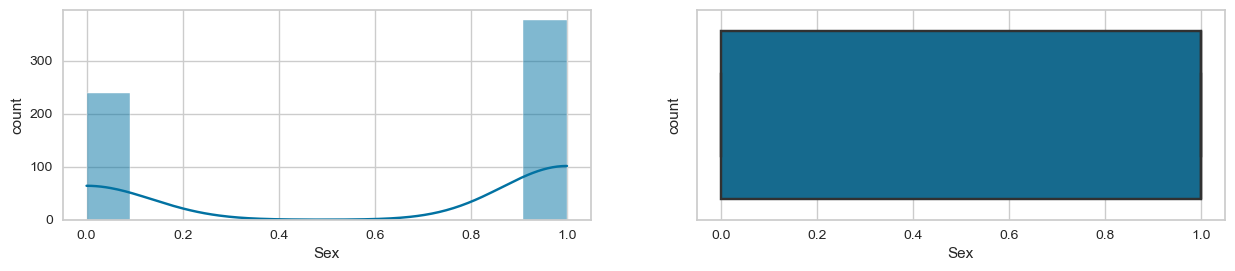

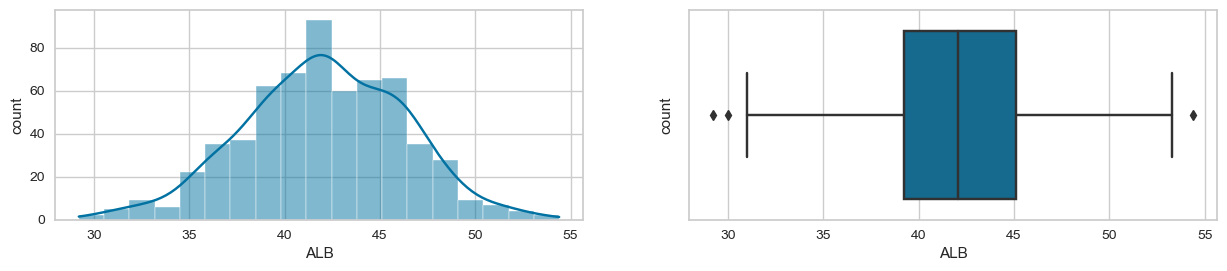

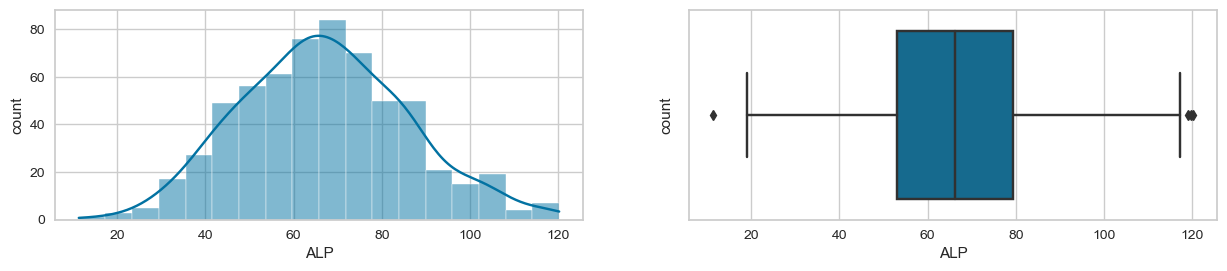

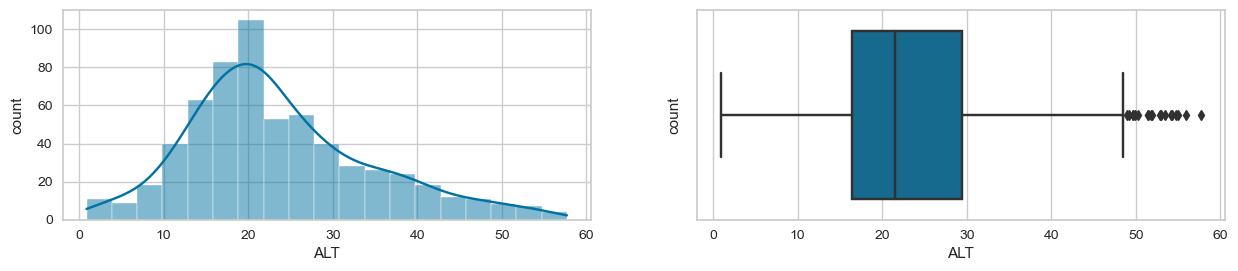

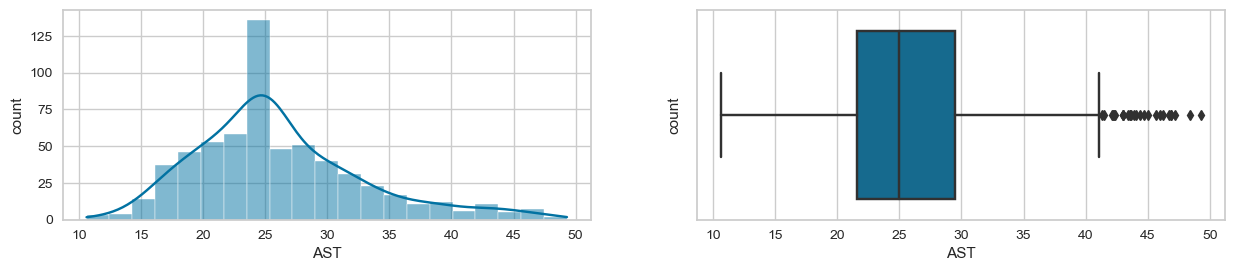

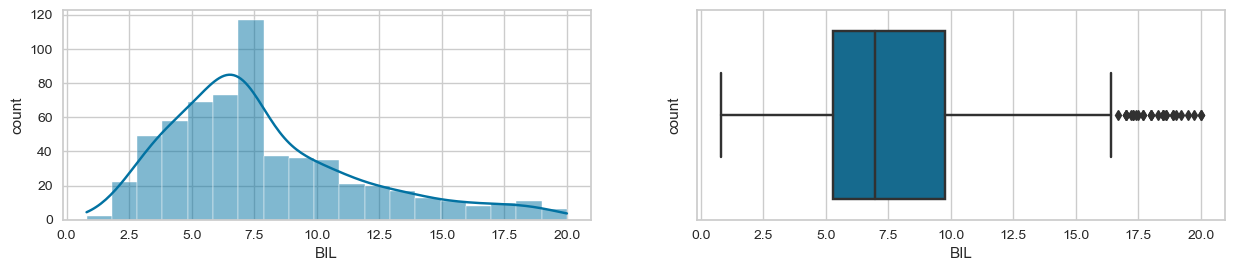

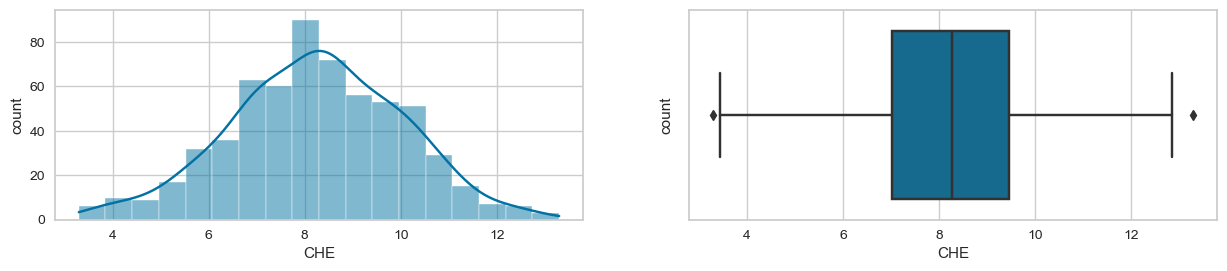

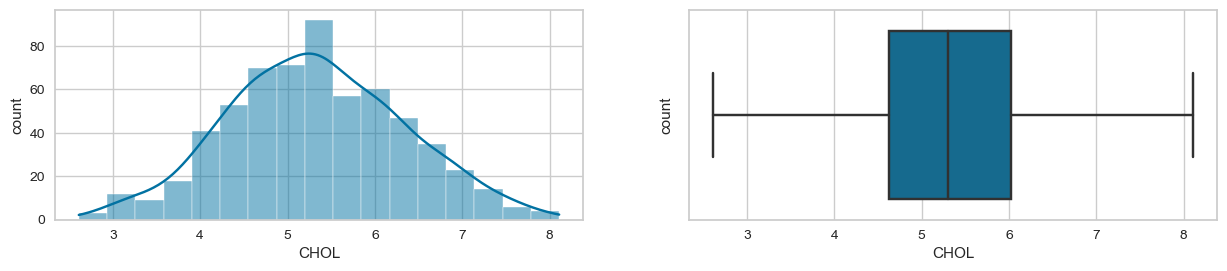

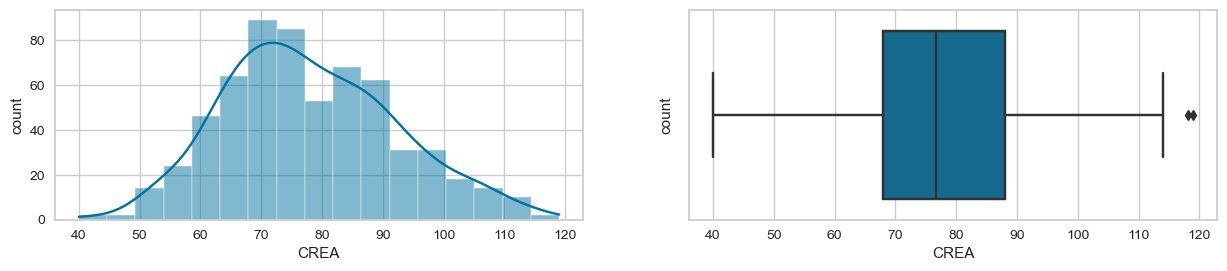

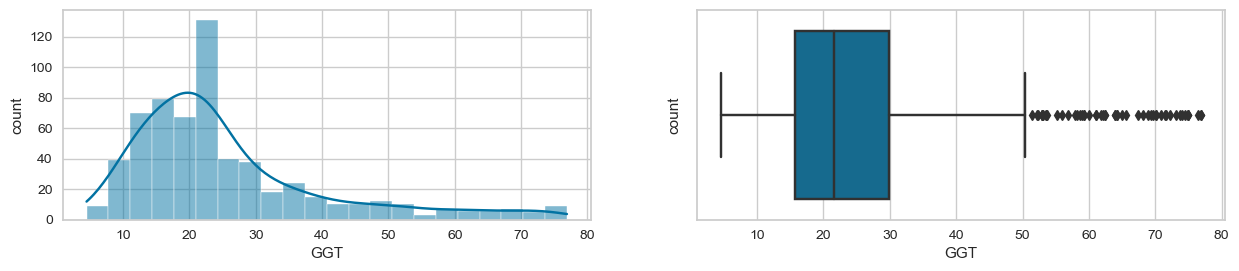

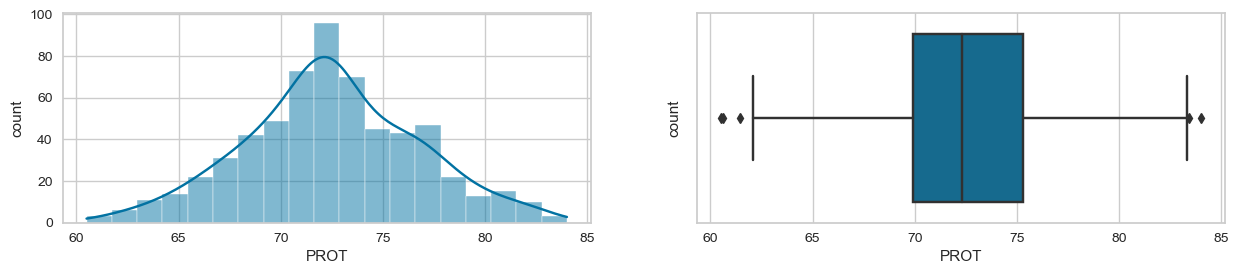

In [8]:
features = data.columns.tolist()

for feature in features:
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('count')

    plt.subplot(2, 2, 2)
    sns.boxplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [9]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = so[(so<1) & (so>0.25)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

,,correlation
Sex,CREA,0.497387
PROT,ALB,0.424034
AST,ALT,0.415445
CHE,CHOL,0.320196
CREA,ALT,0.296902
ALT,CHE,0.296575
Sex,ALT,0.278701
AST,Sex,0.270366


<Axes: xlabel='Sex', ylabel='CREA'>

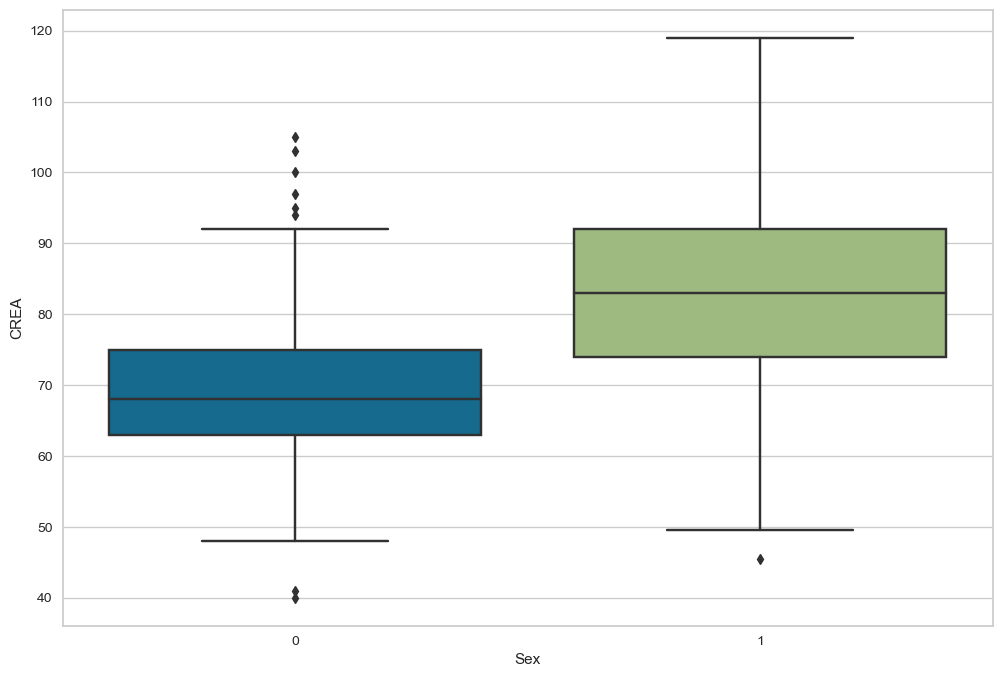

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='CREA')

<Axes: xlabel='Sex', ylabel='ALT'>

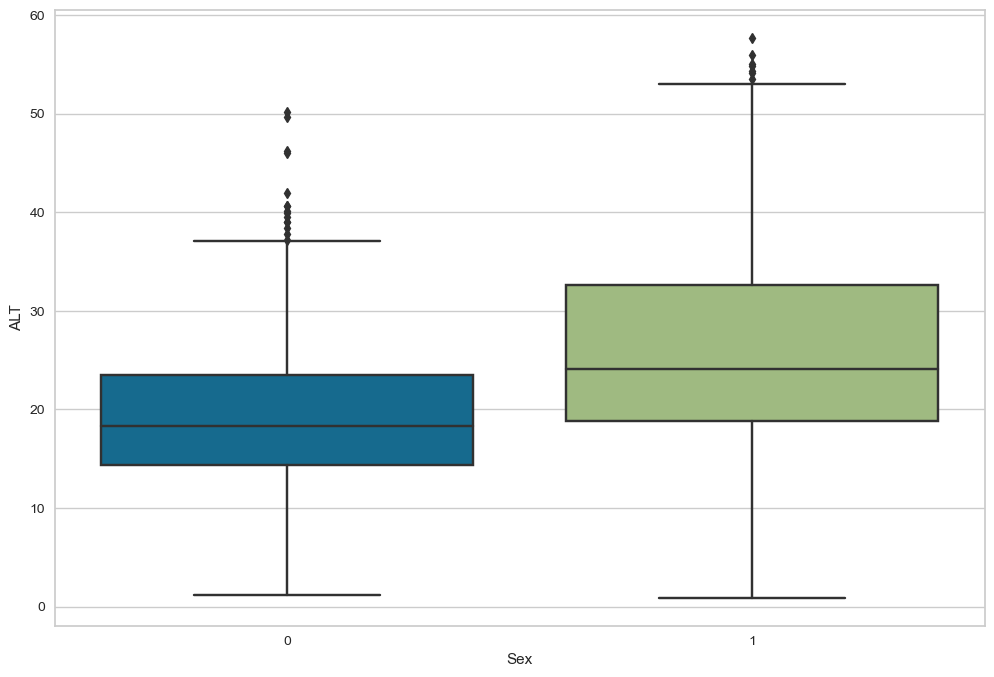

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='ALT')

<Axes: xlabel='Sex', ylabel='AST'>

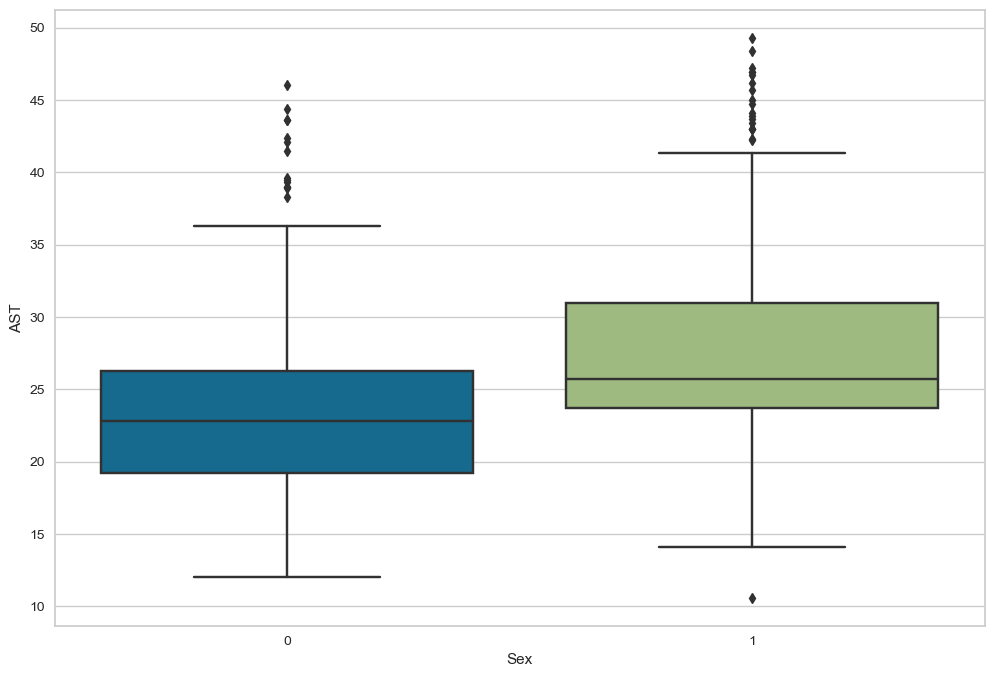

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='AST')

<Axes: xlabel='PROT', ylabel='ALB'>

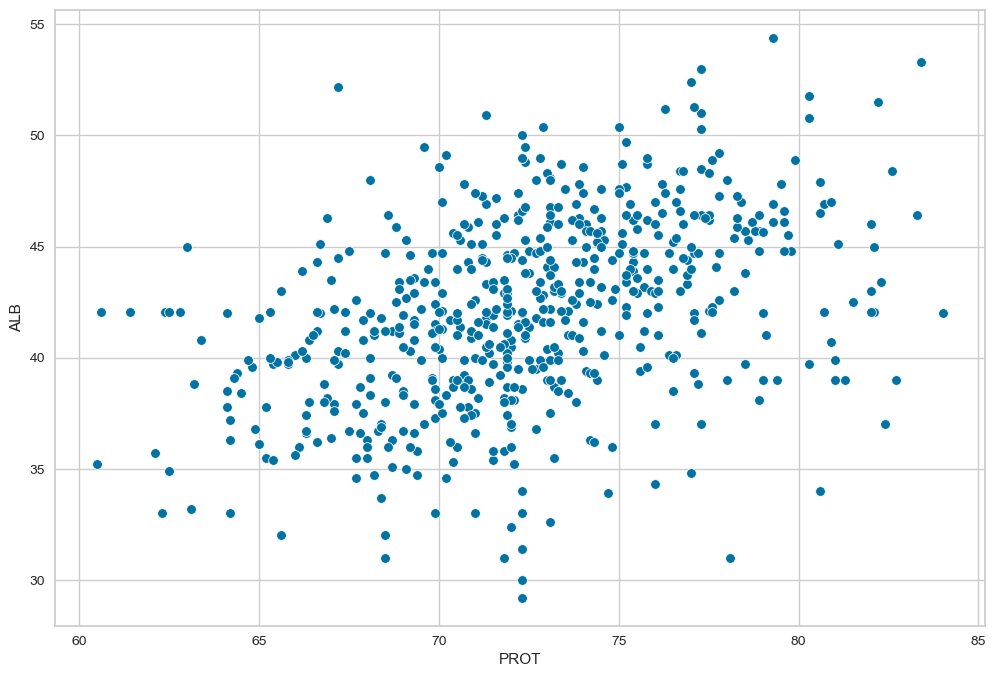

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

<Axes: xlabel='AST', ylabel='ALT'>

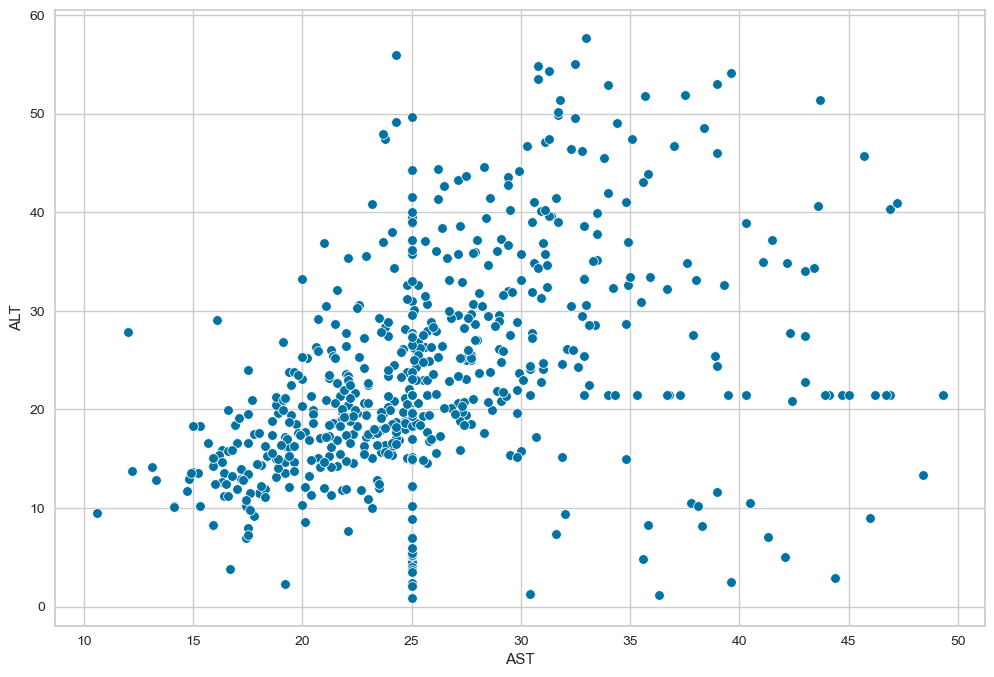

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='AST', y='ALT')

<Axes: xlabel='CHE', ylabel='CHOL'>

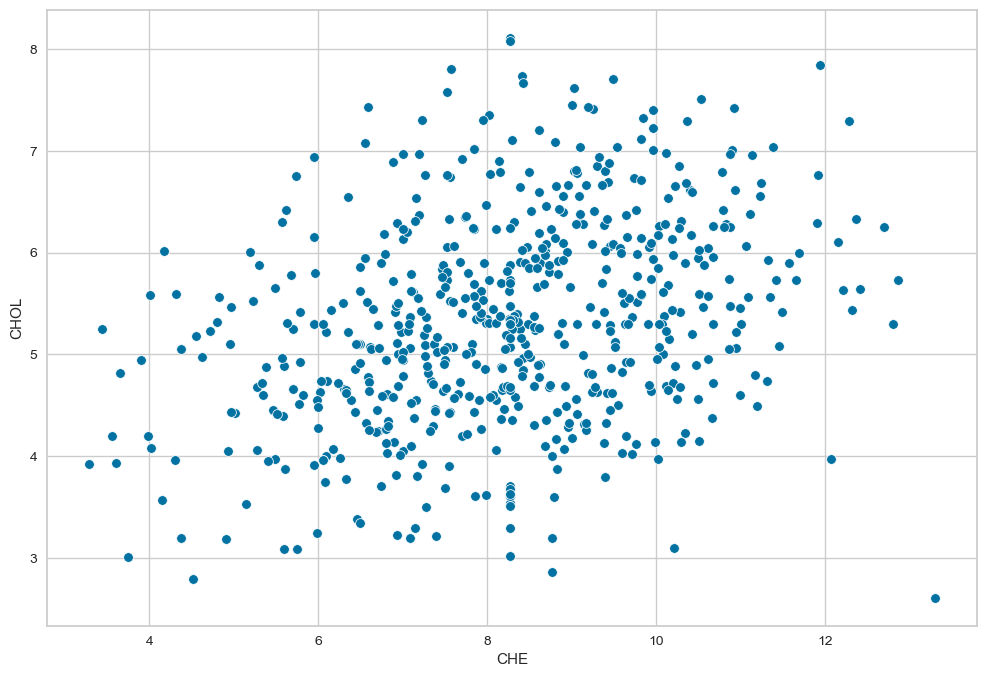

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CHE', y='CHOL')

<Axes: xlabel='CREA', ylabel='ALT'>

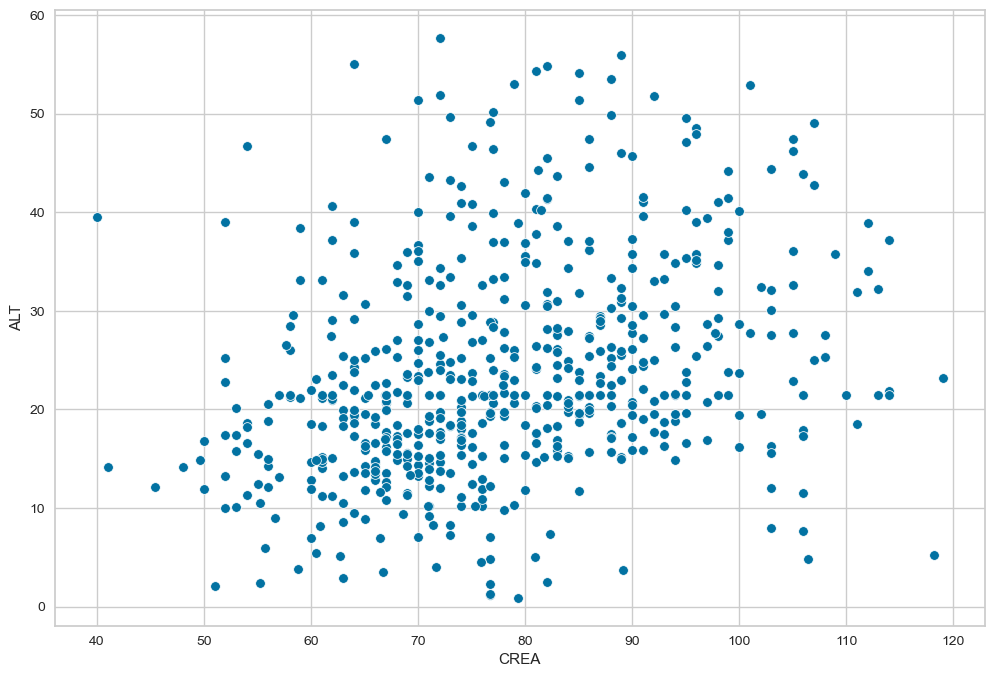

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CREA', y='ALT')

<Axes: xlabel='ALT', ylabel='CHE'>

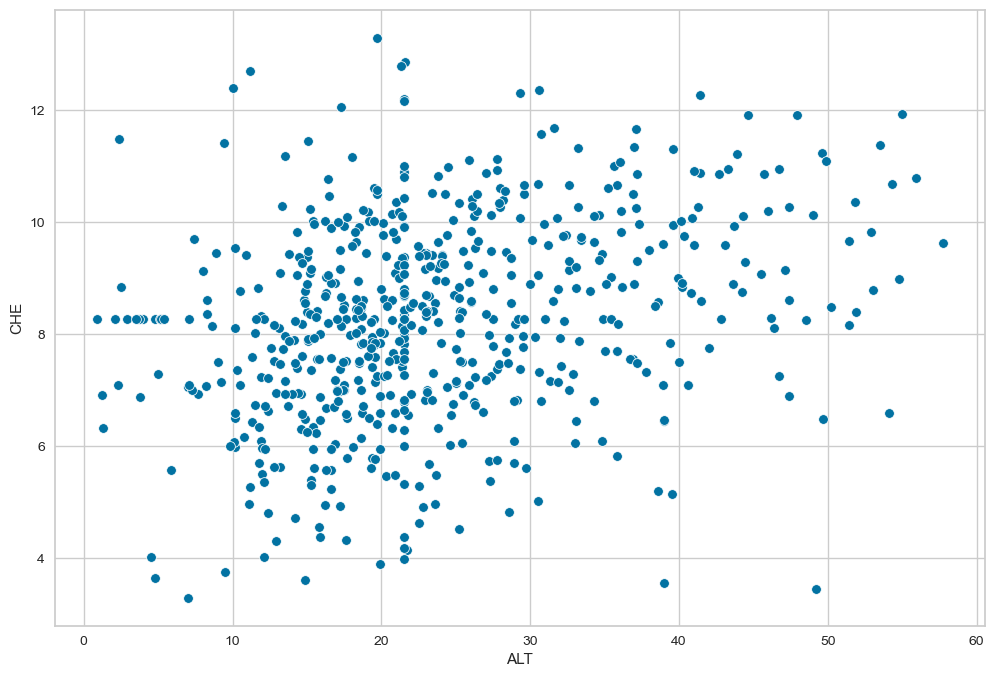

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='ALT', y='CHE')

<Axes: xlabel='PROT', ylabel='ALB'>

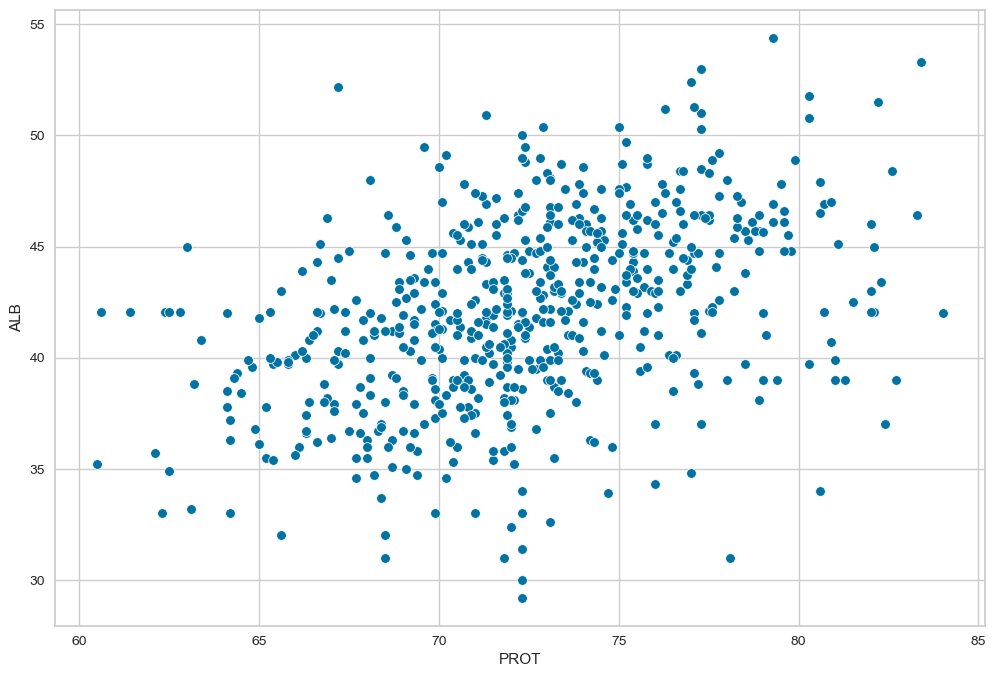

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

<Axes: xlabel='ALT', ylabel='CHOL'>

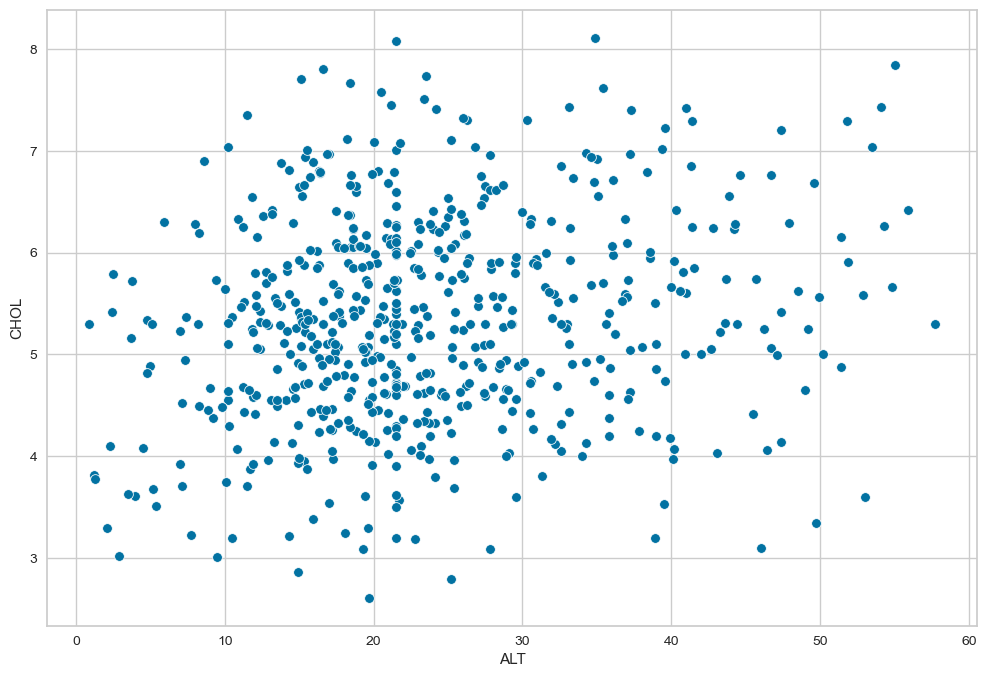

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='ALT', y='CHOL')

**Menggunakan PCA untuk mengetahui fitur terpenting yang dapat digunakan untuk clustering**

In [20]:
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

In [21]:
pca = PCA(n_components=None)
data_pca = pca.fit(data)

In [22]:
features = data.columns
most_important = [np.abs(data_pca.components_[i]).argmax() for i in range (data_pca.components_.shape[0])]
most_important_names = [features[most_important[i]] for i in range(data_pca.components_.shape[0])]
variances = data_pca.explained_variance_ratio_.tolist()

df_importance = pd.DataFrame({'PC': range(1, len(most_important_names)+1), 'Features': most_important_names, 'Variance': variances})
df_importance

,PC,Features,Variance
0,1,ALT,0.231953
1,2,CHOL,0.120999
2,3,PROT,0.104853
3,4,GGT,0.086939
4,5,BIL,0.074273
5,6,ALP,0.072380
6,7,GGT,0.070212
7,8,AST,0.060965
8,9,CHE,0.051293
9,10,ALB,0.045561


*Berdasarkan hasil PCA diatas, ALT dan CHOL memiliki nilai variance yang tinggi, artinya dalam dua kolom tersebut, ada sejumlah besar informasi, sehingga kedua kolom tersebut dapat digunakan untuk model prediktif atau deskriptif untuk HCV ini.*

**Model dengan algoritma elbow**

In [23]:
df = data[['ALT', 'CHOL']]
df

,ALT,CHOL
0,-1.475214,-2.070251
1,-0.526801,-0.517853
2,1.149036,-0.122337
3,0.633393,-0.577180
4,0.817551,-0.992472
...,...,...
610,-1.640957,0.965330
611,-1.917193,-2.277897
612,-1.861946,-1.674736
613,1.406857,-1.111126


In [24]:
km_data = df.copy()

In [25]:
wcss = []

for n in range (1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(km_data)
    wcss.append(kmeans.inertia_)

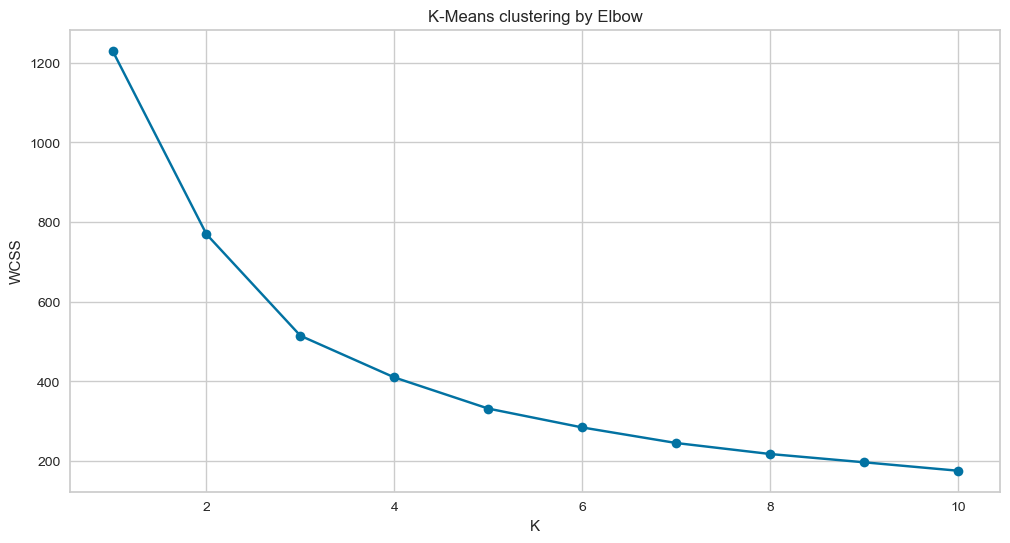

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('K-Means clustering by Elbow')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [27]:
for i in range (1, len(wcss)):
    print(f'cluster {i} -> {wcss[i]}')

cluster 1 -> 769.4946985157812
cluster 2 -> 514.7853495276911
cluster 3 -> 410.1986483423693
cluster 4 -> 331.9906883469847
cluster 5 -> 284.6905498345301
cluster 6 -> 245.63048004793507
cluster 7 -> 218.0279982267108
cluster 8 -> 197.25980159390133
cluster 9 -> 176.11116727149664


**K-Means dengan 2 cluster**

In [28]:
km_data_clus2 = df.copy()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus2)
km_data_clus2['cluster'] = kmeans.labels_
km_data_clus2

,ALT,CHOL,cluster
0,-1.475214,-2.070251,1
1,-0.526801,-0.517853,1
2,1.149036,-0.122337,0
3,0.633393,-0.577180,1
4,0.817551,-0.992472,1
...,...,...,...
610,-1.640957,0.965330,1
611,-1.917193,-2.277897,1
612,-1.861946,-1.674736,1
613,1.406857,-1.111126,1


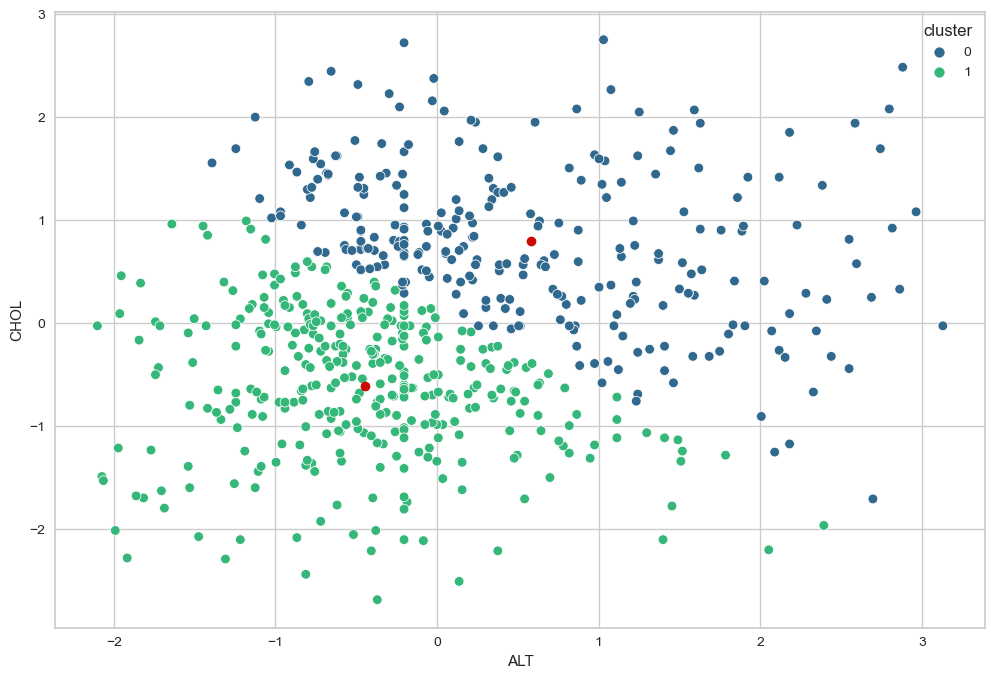

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus2, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 3 cluster**

In [31]:
km_data_clus3 = df.copy()

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus3)
km_data_clus3['cluster'] = kmeans.labels_
km_data_clus3

,ALT,CHOL,cluster
0,-1.475214,-2.070251,1
1,-0.526801,-0.517853,1
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,2
611,-1.917193,-2.277897,1
612,-1.861946,-1.674736,1
613,1.406857,-1.111126,0


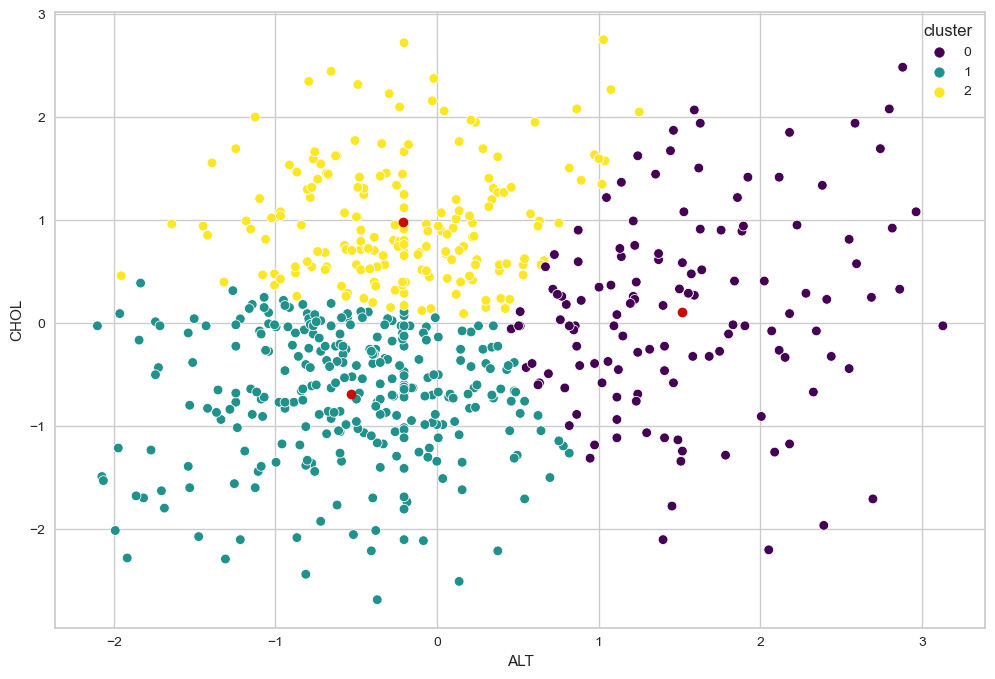

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus3, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 4 cluster**

In [34]:
km_data_clus4 = df.copy()

kmeans = KMeans(n_clusters=4, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus4)
km_data_clus4['cluster'] = kmeans.labels_
km_data_clus4

,ALT,CHOL,cluster
0,-1.475214,-2.070251,2
1,-0.526801,-0.517853,2
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,3
611,-1.917193,-2.277897,2
612,-1.861946,-1.674736,2
613,1.406857,-1.111126,0


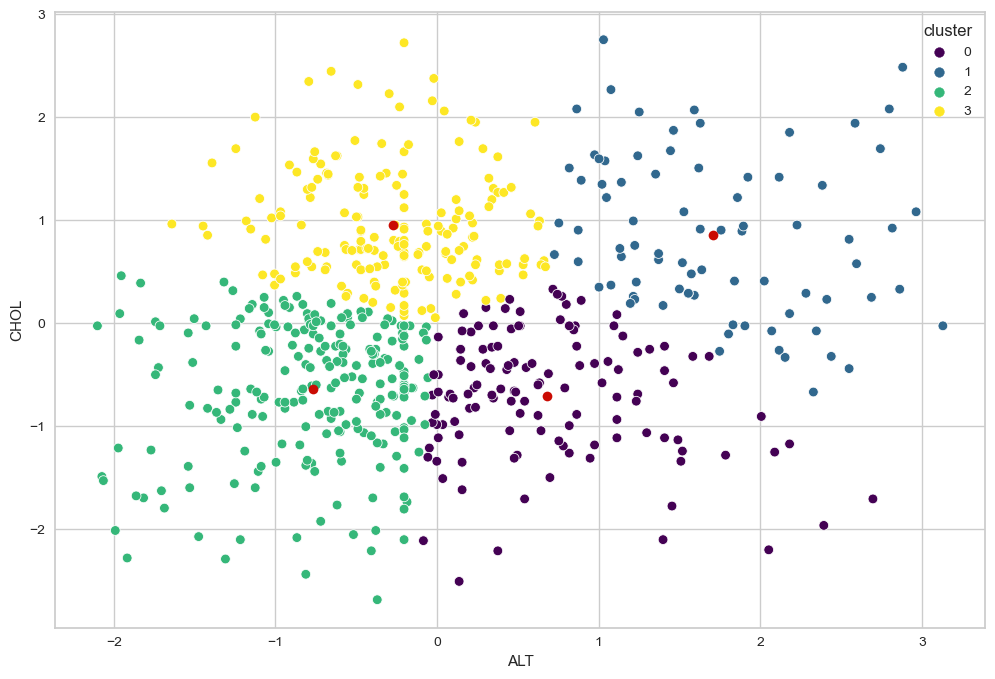

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus4, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 5 cluster**

In [36]:
km_data_clus5 = df.copy()

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus5)
km_data_clus5['cluster'] = kmeans.labels_
km_data_clus5

,ALT,CHOL,cluster
0,-1.475214,-2.070251,4
1,-0.526801,-0.517853,3
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,1
611,-1.917193,-2.277897,4
612,-1.861946,-1.674736,4
613,1.406857,-1.111126,0


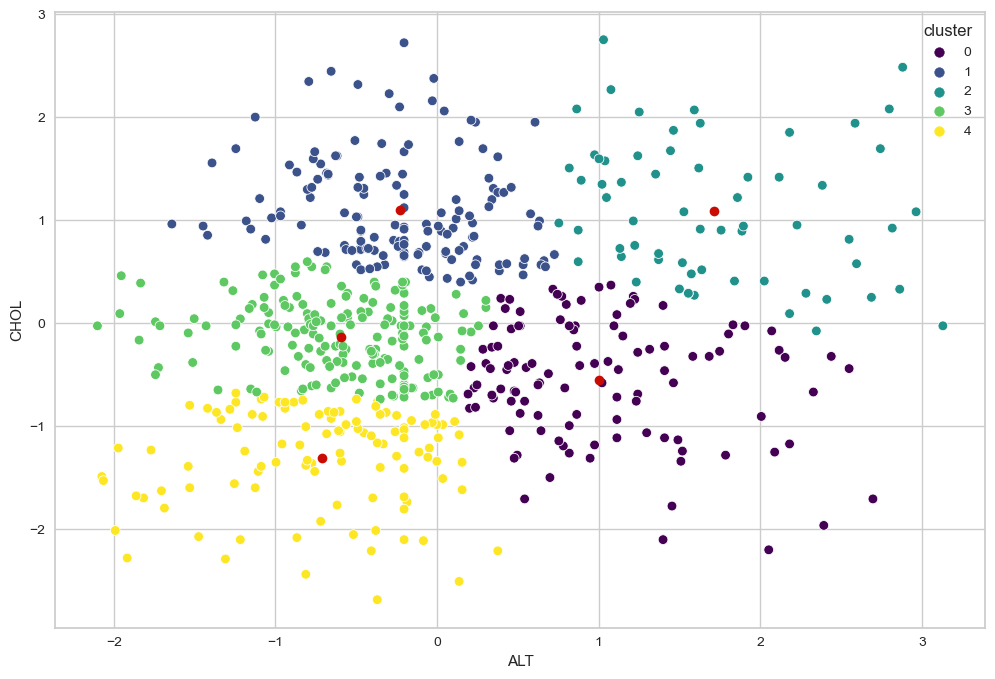

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus5, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [38]:
sil_data = df.copy()

In [39]:
scores = []

for n in range (2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, max_iter=1000)
    labels = kmeans.fit_predict(sil_data)
    score = silhouette_score(sil_data, labels)
    scores.append(score)

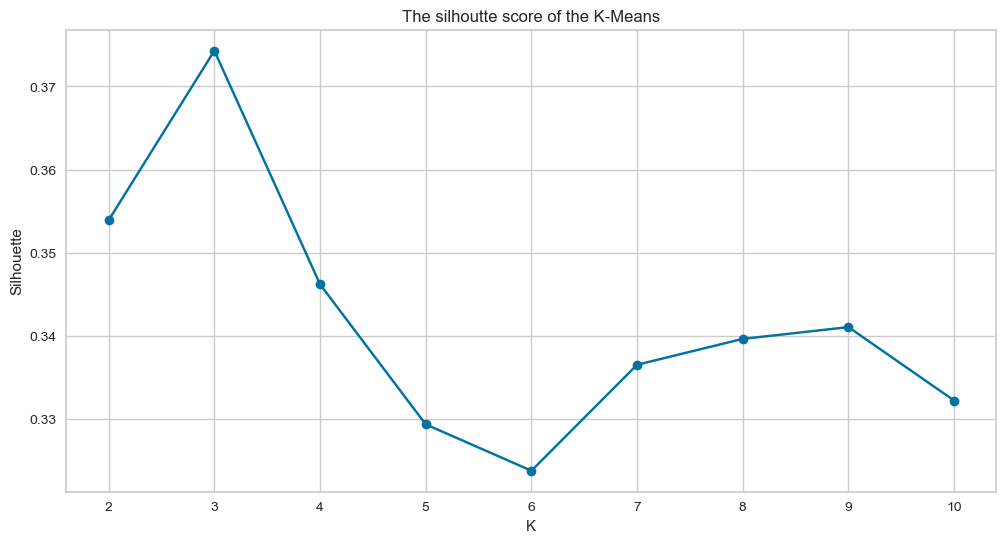

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')
plt.title('The silhoutte score of the K-Means')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [41]:
for i, score in enumerate(scores):
    print(f'Score of cluster {i+2}: {score}')

Score of cluster 2: 0.35392829367965145
Score of cluster 3: 0.3742983069045894
Score of cluster 4: 0.34621712476359623
Score of cluster 5: 0.32938551539969085
Score of cluster 6: 0.3238133413123699
Score of cluster 7: 0.33655035593781163
Score of cluster 8: 0.33966286807072016
Score of cluster 9: 0.3410739006253424
Score of cluster 10: 0.33224950375905454


In [42]:
best_n_cluster = scores.index(max(scores))+2
print(f'Best n cluster: {best_n_cluster}')

Best n cluster: 3


In [43]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(sil_data)
sil_data['cluster'] = kmeans.labels_
sil_data

,ALT,CHOL,cluster
0,-1.475214,-2.070251,1
1,-0.526801,-0.517853,1
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,2
611,-1.917193,-2.277897,1
612,-1.861946,-1.674736,1
613,1.406857,-1.111126,0


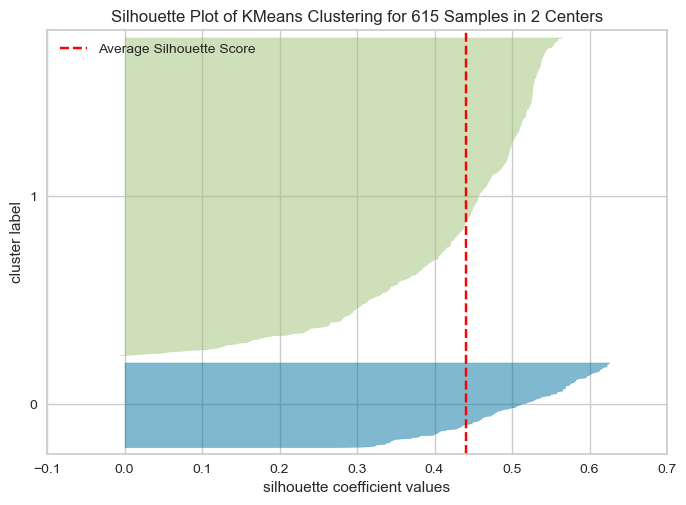

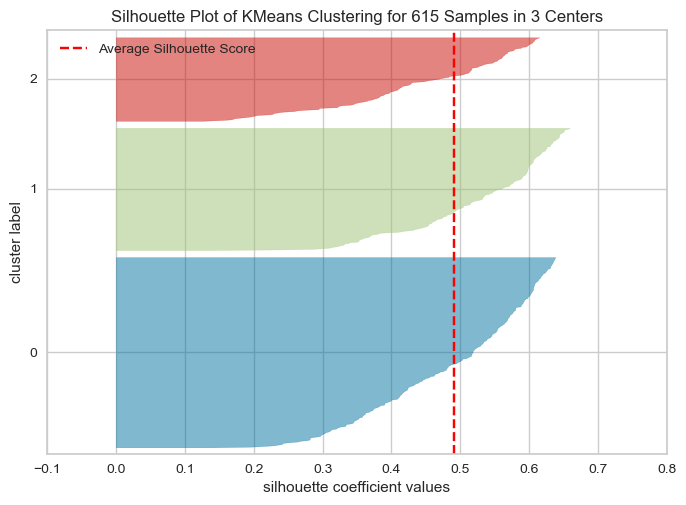

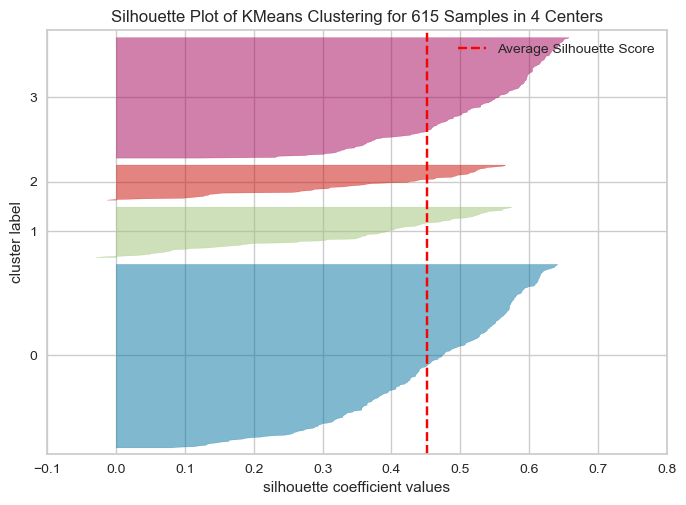

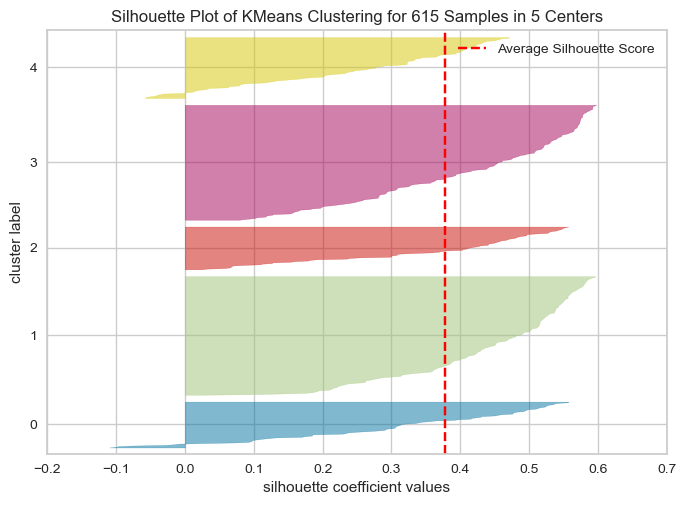

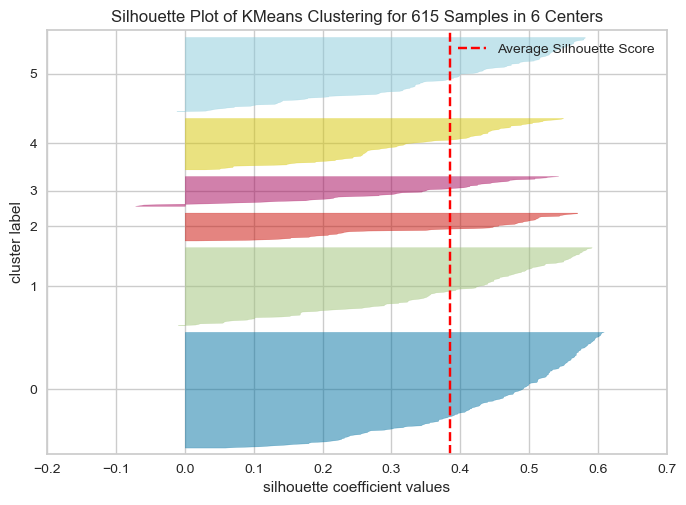

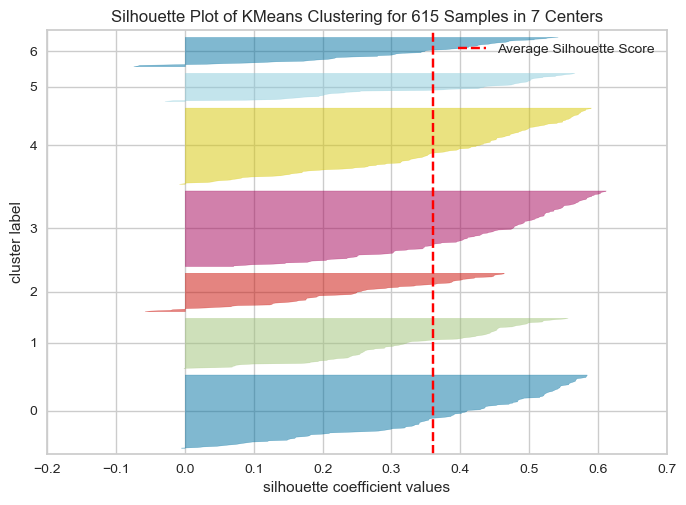

In [44]:
for i in range(2, len(scores) - 1):
    model = KMeans(n_clusters=i, random_state=42)
    visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(sil_data)
    visualizer.show()

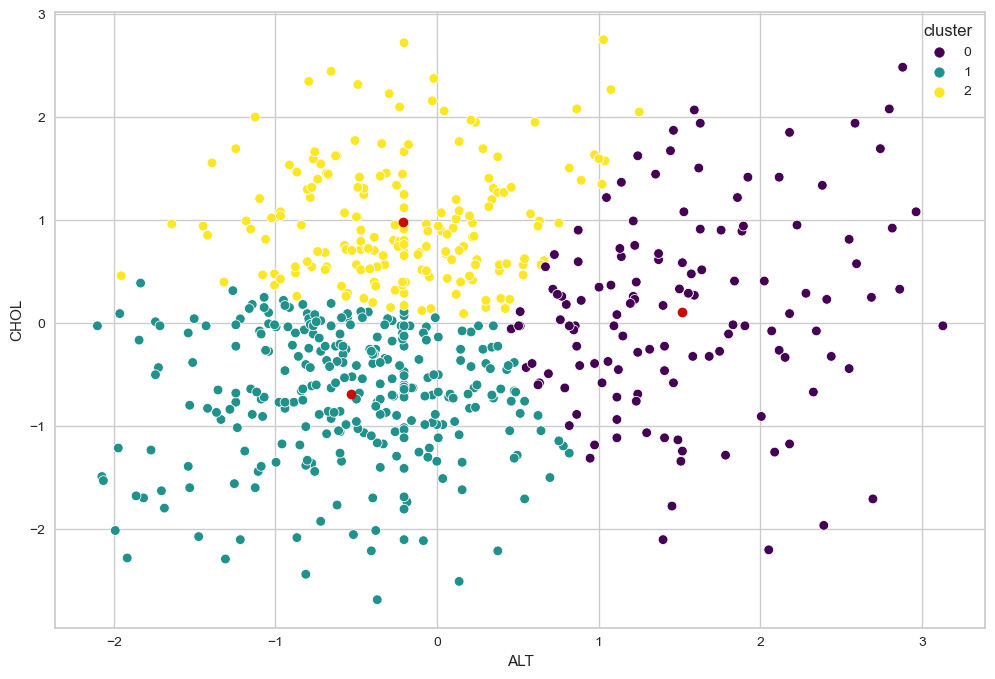

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sil_data, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [46]:
print(Counter(sil_data['cluster']))

Counter({1: 295, 2: 190, 0: 130})


**Model dengan algoritma Hierarchical**

In [47]:
df_hr = df.copy()

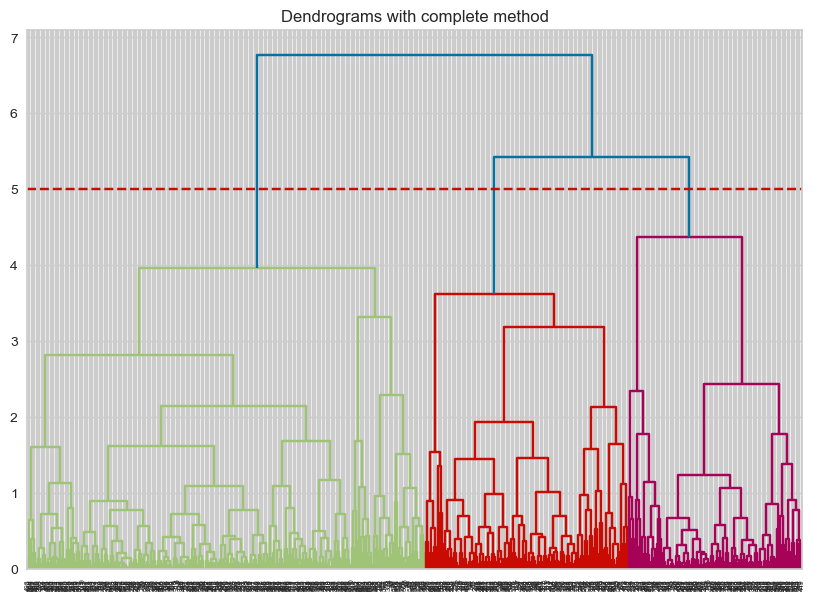

In [48]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with complete method")
dend = sch.dendrogram(sch.linkage(df_hr, method='complete'))
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

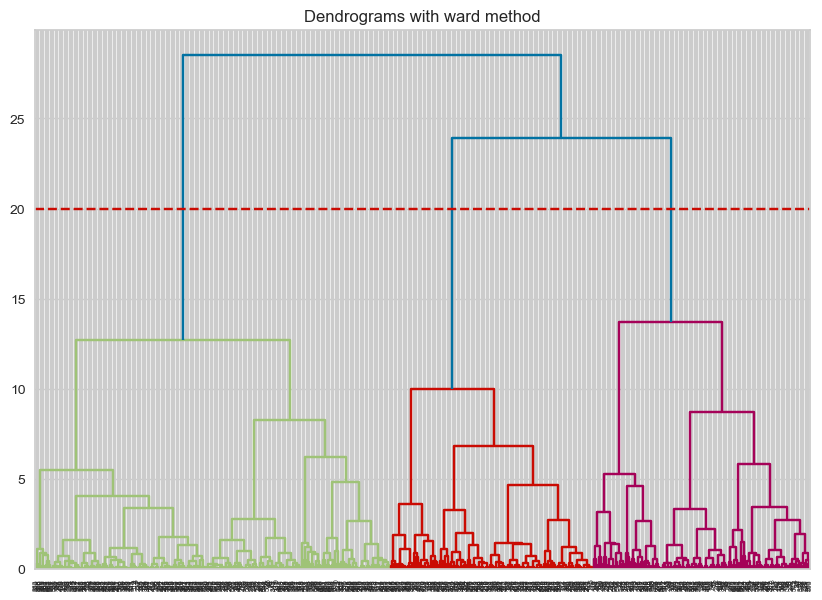

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with ward method")
dend = sch.dendrogram(sch.linkage(df_hr, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

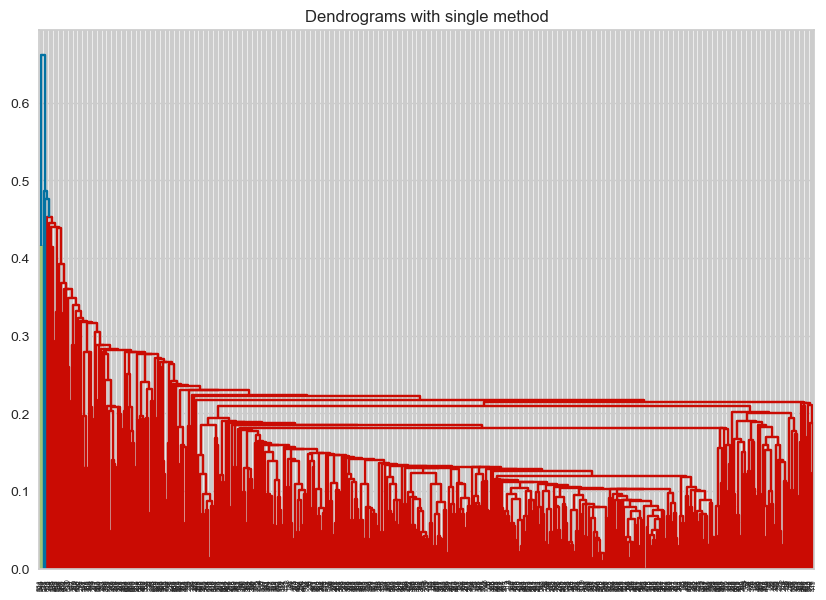

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with single method")
dend = sch.dendrogram(sch.linkage(df_hr, method='single'))

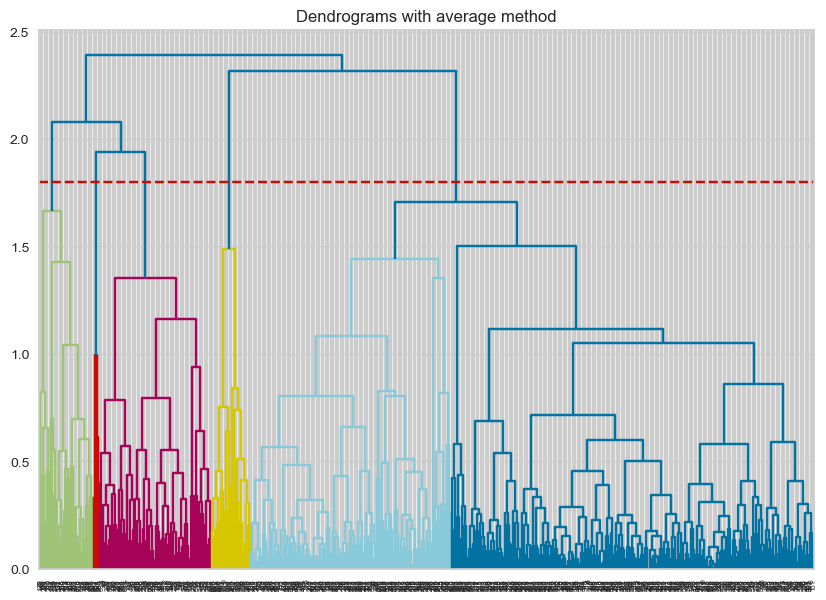

In [51]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with average method")
dend = sch.dendrogram(sch.linkage(df_hr, method='average'))
plt.axhline(y=1.8, color='r', linestyle='--')
plt.show()

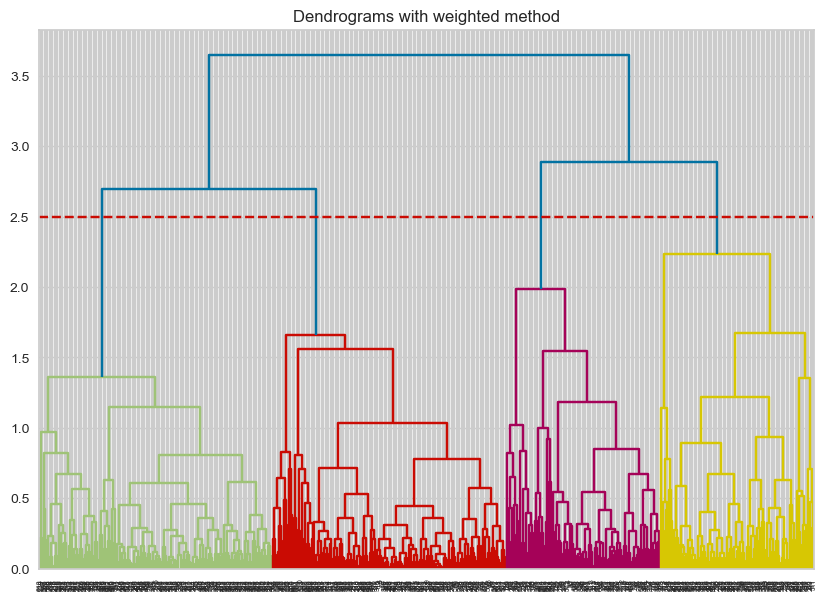

In [52]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with weighted method")
dend = sch.dendrogram(sch.linkage(df_hr, method='weighted'))
plt.axhline(y=2.5, color='r', linestyle='--')

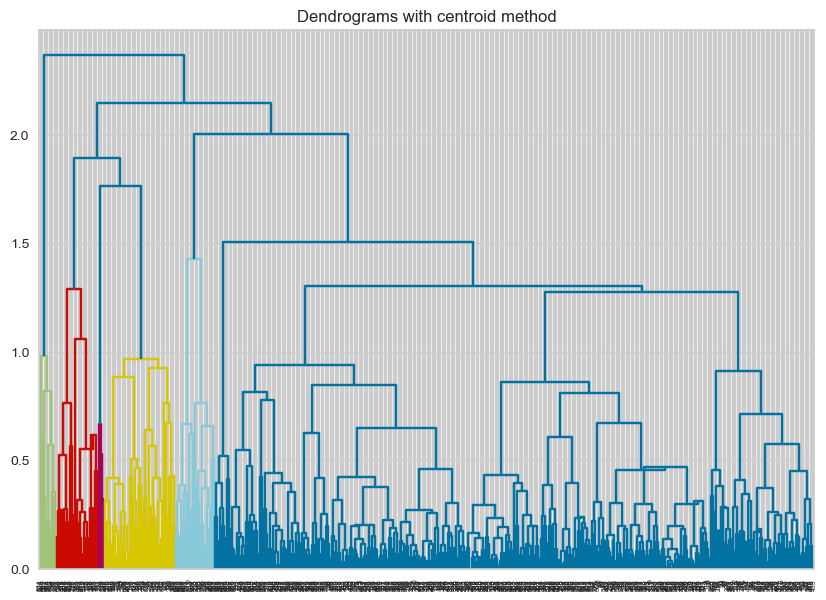

In [53]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with centroid method")
dend = sch.dendrogram(sch.linkage(df_hr, method='centroid'))


In [54]:
scores = []

for i in range(2, 11):
    hr = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels = hr.fit_predict(df_hr)
    score = silhouette_score(df_hr, labels)
    scores.append(score)

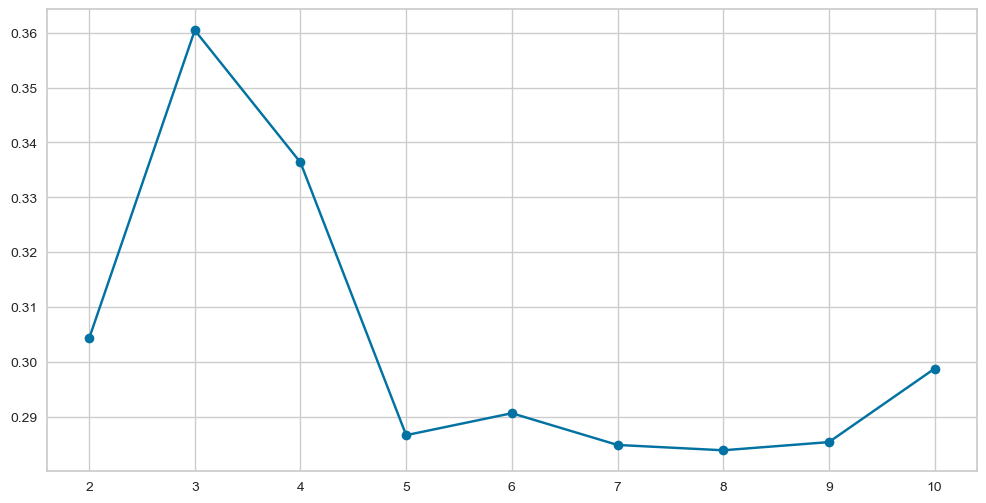

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')

In [56]:
hr = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hr.fit_predict(df_hr)
df_hr['cluster'] = labels
df_hr

,ALT,CHOL,cluster
0,-1.475214,-2.070251,1
1,-0.526801,-0.517853,1
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,2
611,-1.917193,-2.277897,1
612,-1.861946,-1.674736,1
613,1.406857,-1.111126,0


In [57]:
print(Counter(df_hr['cluster']))

Counter({1: 282, 0: 172, 2: 161})


<Axes: xlabel='ALT', ylabel='CHOL'>

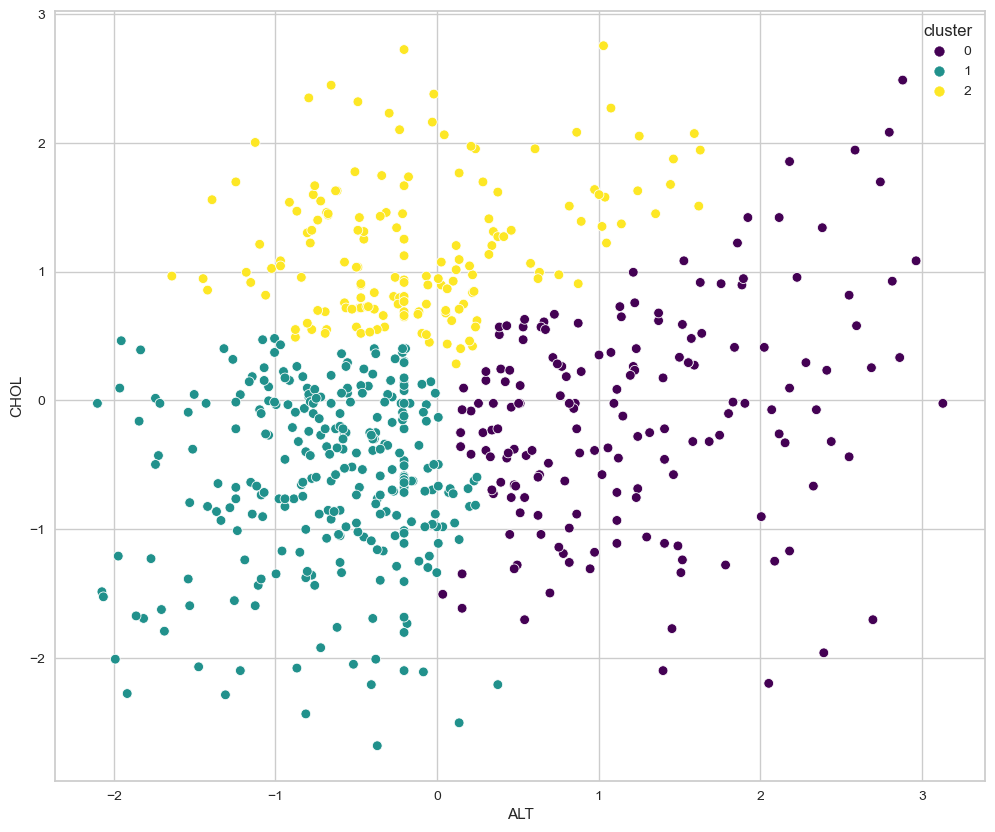

In [58]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_hr, x='ALT', y='CHOL', hue='cluster', palette='viridis')

**Model dengan algoritma DBSCAN**

In [59]:
df_db = df.copy()

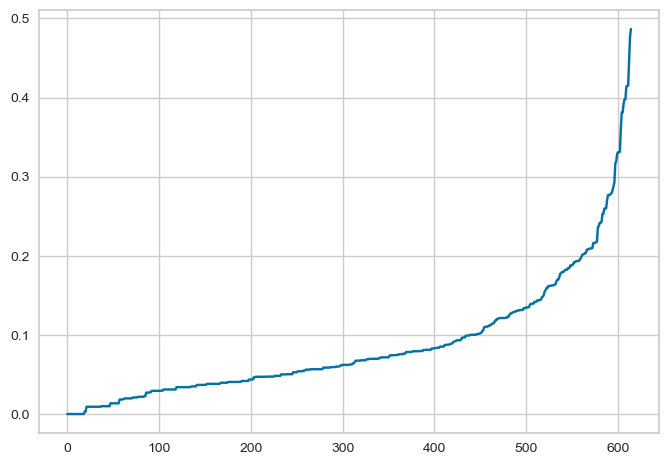

In [60]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_db)
distances, indices = nbrs.kneighbors(df_db)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [61]:
best_eps = 0
best_min_sample = 0
best_score = -1

for i in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=i, min_samples=min_samples)
        labels = dbscan.fit_predict(df_db)
        
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            
            if score > best_score:
                best_score = score
                best_eps = i
                best_min_sample = min_samples

print(f'Best eps: {best_eps}, best min_Sample: {best_min_sample}')

Best eps: 0.8, best min_Sample: 8


In [62]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(df_db)
df_db['cluster'] = labels
df_db

,ALT,CHOL,cluster
0,-1.475214,-2.070251,-1
1,-0.526801,-0.517853,0
2,1.149036,-0.122337,0
3,0.633393,-0.577180,0
4,0.817551,-0.992472,0
...,...,...,...
610,-1.640957,0.965330,0
611,-1.917193,-2.277897,-1
612,-1.861946,-1.674736,0
613,1.406857,-1.111126,0


Text(0.5, 1.0, 'DBSCAN clustering')

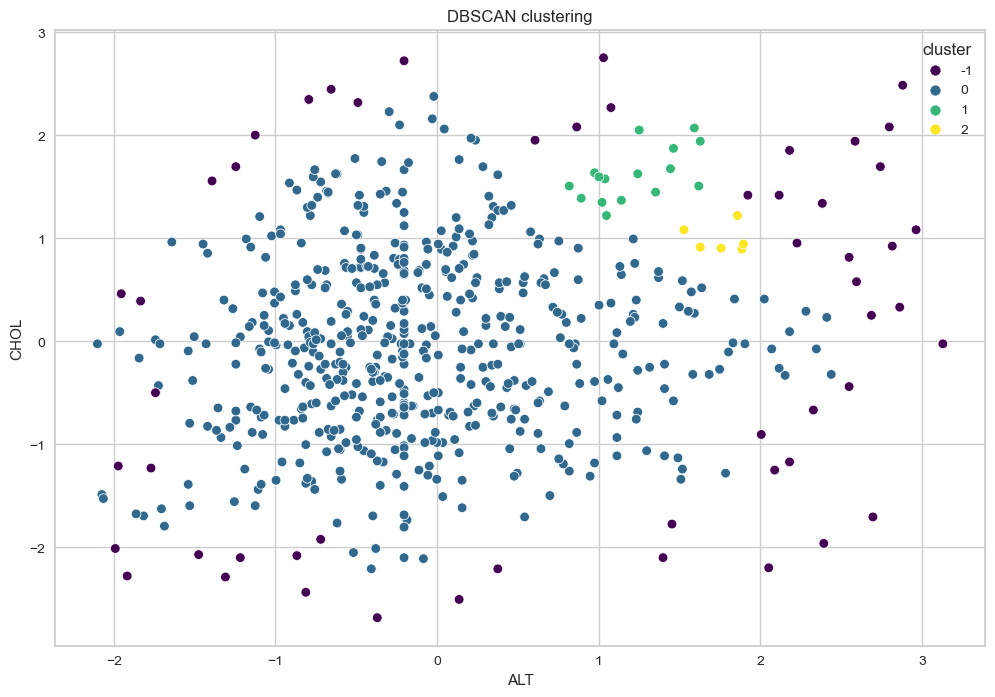

In [63]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_db, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.title('DBSCAN clustering')

In [64]:
print(Counter(df_db['cluster']))

Counter({0: 540, -1: 53, 1: 16, 2: 6})
